Scenario 1 – Air Bnb</br>
You and a group of friends are considering purchasing a property in Chicago that you can use as an investment. You have heard from other people that they have made a lot of money by renting out either a room or an entire unit (apartment or house). Your friends ask you to analyze data so that they can understand how much you would charge per night based on the type of dwelling you were to purchase.



In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sqlalchemy import create_engine

In [ ]:
# Note:: The make sure you use the information from your specific PostgreSQL installation
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'racharya001' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [3]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [4]:
# Uploading csv file
df= pd.read_csv('listings.csv')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

Here, we can see some missing values and some columns with no values at all which will be dealt below.

In [7]:
#selecting random 100 samples from the dataset
random_rows = df.sample(n=100, random_state=42)
random_rows.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4963,40182247,3 bdrm; free internet in pilsen/southloop,306943744,Joe,NaN,Lower West Side,41.85974,-87.65797,Entire home/apt,200,1,1,2020-02-17,0.14,8,365
6356,45438479,English Lavender Room,258297883,Darkhan,NaN,Humboldt Park,41.88866,-87.71965,Private room,44,1,0,NaN,NaN,3,1
4866,39793384,ROWULA HOUSE - WARM AFRICAN HOSPITALITY IN CHI...,13784535,Omar,NaN,South Chicago,41.73711,-87.54816,Private room,45,1,1,2020-08-31,1.00,1,357
4022,35942729,Spacious Sedgwick Condo - Steps to Old Town,200416010,Saul,NaN,Near North Side,41.91054,-87.63743,Entire home/apt,255,3,11,2020-09-07,1.09,6,342
132,1468342,Quaint Serenity in Bronzeville,4081052,Suzetta,NaN,Grand Boulevard,41.81266,-87.61586,Private room,55,2,123,2020-02-16,1.42,1,364


In [8]:
# Saving selected rows to a CSV file
random_rows.to_csv("live_data.csv", index=False)

In [9]:
# Removing selected rows from the original DataFrame
df = df.drop(random_rows.index)

In [10]:
table_name = r'bnb_data'
schema = r'raw' 

df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

6297

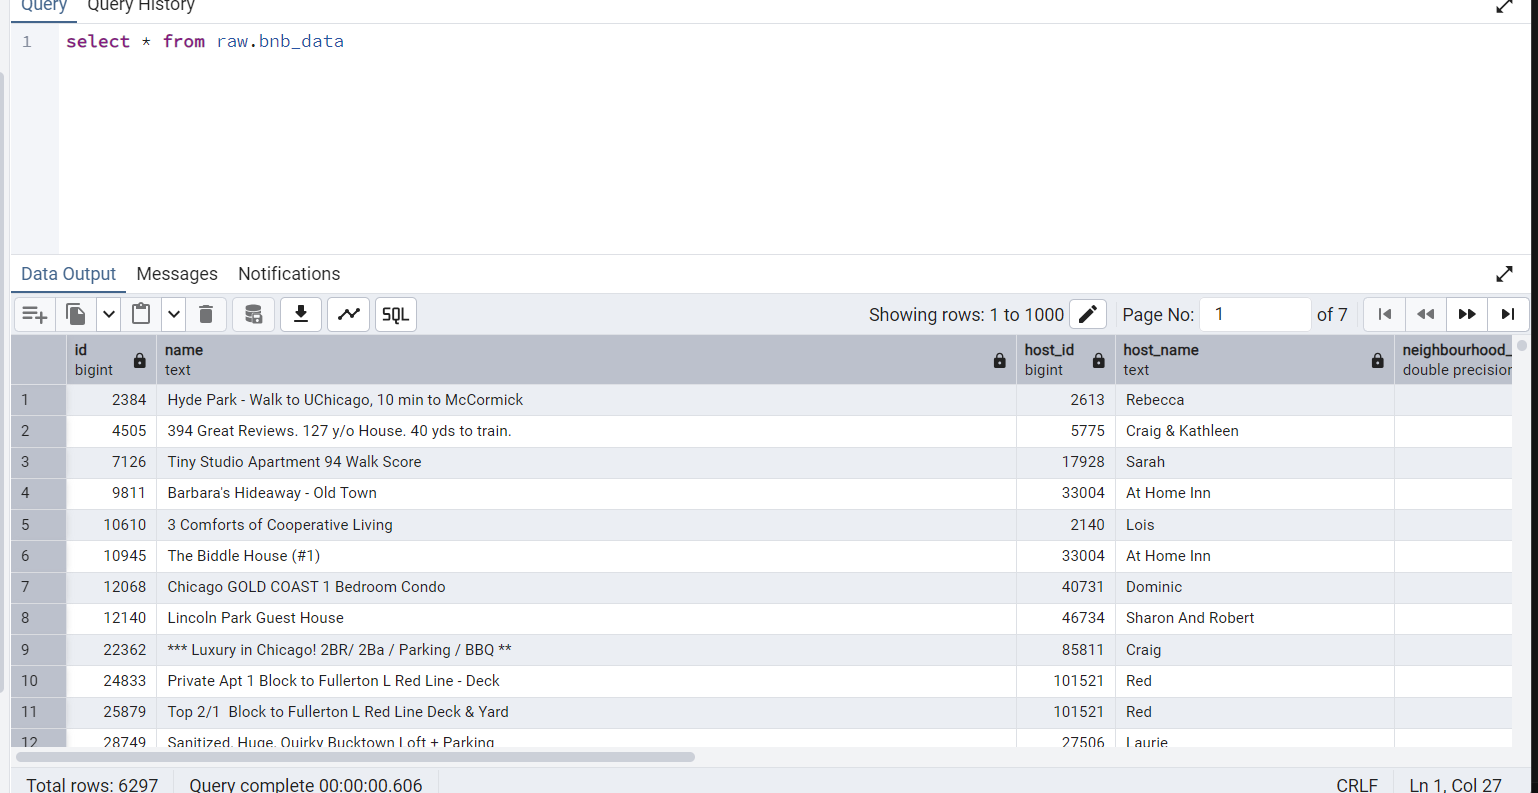

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6297 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6297 non-null   int64  
 1   name                            6297 non-null   object 
 2   host_id                         6297 non-null   int64  
 3   host_name                       6297 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6297 non-null   object 
 6   latitude                        6297 non-null   float64
 7   longitude                       6297 non-null   float64
 8   room_type                       6297 non-null   object 
 9   price                           6297 non-null   int64  
 10  minimum_nights                  6297 non-null   int64  
 11  number_of_reviews               6297 non-null   int64  
 12  last_review                     5183 no

Here, we can see 100 rows removed from the dataset. 

### Data Definition  
| Field Name                         | Description                                                 | Data Type    |
|-------------------------------------|-------------------------------------------------------------|-------------|
| `id`                                | Unique identifier for each listing                          | Discrete (Integer) |
| `name`                              | Name or title of the listing                               | Nominal (Categorical) |
| `host_id`                           | Unique identifier for the host                            | Discrete (Integer) |
| `host_name`                         | Name of the host                                          | Nominal (Categorical) |
| `neighbourhood_group`               | Grouping of neighborhoods (empty in this dataset)        | Nominal (Categorical) |
| `neighbourhood`                     | Specific neighborhood location                           | Nominal (Categorical) |
| `latitude`                          | Geographic coordinate (latitude)                         | Continuous (Float) |
| `longitude`                         | Geographic coordinate (longitude)                        | Continuous (Float) |
| `room_type`                         | Type of rental space (e.g., Entire home, Private room)  | Nominal (Categorical) |
| `price`                             | Price per night                                          | Continuous (Integer) |
| `minimum_nights`                    | Minimum nights required for booking                     | Discrete (Integer) |
| `number_of_reviews`                 | Total number of reviews                                 | Discrete (Integer) |
| `last_review`                       | Date of the most recent review                         | Ordinal (Date) |
| `reviews_per_month`                 | Average number of reviews per month                    | Continuous (Float) |
| `calculated_host_listings_count`    | Total listings hosted by the same host                 | Discrete (Integer) |
| `availability_365`                   | Number of days available per year                     | Discrete (Integer)




### Analytical Question  
**What factors influence the price of an Airbnb listing in the dataset?** 

**Target Variable**: price 
- **Potential Features**: room_type, neighbourhood, reviews_per_month, number_of_reviews, availability_365, minimum_nights, calculated_host_listings_count 

## Selected Features for Price Prediction  

To predict Airbnb prices, we selected features that likely impact pricing:  

- **`room_type`**: The type of rental (Entire home, Private room, or Shared room) affects the price.  
- **`neighbourhood`**: Different areas have different levels of demand, influencing price.  
- **`reviews_per_month`**: More reviews per month suggest higher demand, which may affect price.  
- **`number_of_reviews`**: While it doesn't directly set the price, it helps measure popularity.  
- **`availability_365`**: Listings available for more days might have different pricing strategies.  
- **`minimum_nights`**: Some listings require longer stays, which can impact nightly rates.  
- **`calculated_host_listings_count`**: Hosts managing multiple listings may price them differently.  

## Features Removed  

Some columns were not useful for predicting price, so they were removed:  

- **`id` & `host_id`**: These are just unique identifiers with no impact on pricing.  
- **`name` & `host_name`**: Text-based data that isn't useful for numerical analysis.  
- **`neighbourhood_group`**: This column was empty, so it was excluded.  
- **`latitude` & `longitude`**: Since `neighbourhood` already provides location details, these were unnecessary.  
- **`last_review`**: The date of the last review doesn't directly affect the price.  


## Data Cleaning and Preparation  

To ensure our dataset is ready for machine learning, we must clean and preprocess the data by handling missing values, encoding categorical variables, and addressing potential outliers.  

### Handling Missing Values  
- **`reviews_per_month`**: This column contains missing values, which likely occur when a listing has no reviews. We will replace missing values with `0`, assuming that the listing has not received any reviews.  
- **`last_review`**: Since we have already removed this feature, no further action is needed.  

### Encoding Categorical Variables  
- **`room_type`** and **`neighbourhood`** are categorical variables that must be converted into numerical format for machine learning models. We will use one-hot encoding to transform these variables into numerical columns.  

### Handling Outliers  
- **`price`**: Prices that are excessively high or extremely low may distort the model. We will analyze the distribution and remove extreme outliers based on the interquartile range (IQR) method.  
- **`minimum_nights`**: Some listings have unrealistic minimum stay requirements (e.g., 365 days). We will cap extreme values to a reasonable threshold.  
- **`availability_365`**: Listings with values of `0` might indicate inactive listings. We will explore whether to keep or remove these records.  

### Final Data Check  
- Ensure there are no remaining missing values.  
- Normalize or scale numerical features if needed for machine learning models.  


In [12]:
# Selecting relevant features
df = df[['neighbourhood', 'room_type', 'price', 'minimum_nights', 
         'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [13]:
# Handling missing values
df['reviews_per_month'].fillna(0, inplace=True)

C:\Users\prakr\AppData\Local\Temp\ipykernel_18084\2898215733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [14]:
# Handling outliers using the IQR method for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [15]:
# Capping extreme values for 'minimum_nights'
df['minimum_nights'] = np.where(df['minimum_nights'] > 30, 30, df['minimum_nights'])

In [16]:
# Removing listings with zero availability
df = df[df['availability_365'] > 0]

In [17]:
# Encoding categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['room_type', 'neighbourhood'], drop_first=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4666 entries, 0 to 6396
Data columns (total 84 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   price                                 4666 non-null   int64  
 1   minimum_nights                        4666 non-null   int64  
 2   number_of_reviews                     4666 non-null   int64  
 3   reviews_per_month                     4666 non-null   float64
 4   calculated_host_listings_count        4666 non-null   int64  
 5   availability_365                      4666 non-null   int64  
 6   room_type_Hotel room                  4666 non-null   bool   
 7   room_type_Private room                4666 non-null   bool   
 8   room_type_Shared room                 4666 non-null   bool   
 9   neighbourhood_Archer Heights          4666 non-null   bool   
 10  neighbourhood_Armour Square           4666 non-null   bool   
 11  neighbourhood_Ashburn 

Wow! All the null values and outlieres has been removed or handled finally. And now lets begin our journey of second part.

In [19]:
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_Archer Heights,...,neighbourhood_Washington Heights,neighbourhood_Washington Park,neighbourhood_West Elsdon,neighbourhood_West Englewood,neighbourhood_West Garfield Park,neighbourhood_West Lawn,neighbourhood_West Pullman,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn
0,60,2,178,2.56,1,353,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,105,2,395,2.81,1,155,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,60,2,384,2.81,1,321,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,65,4,49,0.63,9,300,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,21,1,44,0.61,5,168,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Defining the data cleansing schema
cleansing_schema = pd.DataFrame({
    "Field Name": ["reviews_per_month", "price", "minimum_nights", "availability_365", "room_type", "neighbourhood"],
    "Manipulation Type": ["Missing Value Imputation", "Outlier Removal", "Capping", "Filtering", "One-Hot Encoding", "One-Hot Encoding"],
    "Numeric Values / Description": [
        "Replace NaN with 0",
        "Remove values outside IQR (Q1-1.5*IQR, Q3+1.5*IQR)",
        "Cap values above 30 to 30",
        "Remove rows where value is 0",
        "Convert categorical to numerical",
        "Convert categorical to numerical"
    ]
})

# Save as a reference CSV file
cleansing_schema.to_csv("data_cleansing_schema.csv", index=False)


In [22]:
table_name = r'bnb_cleaning'
schema = r'raw' 
cleansing_schema.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

6

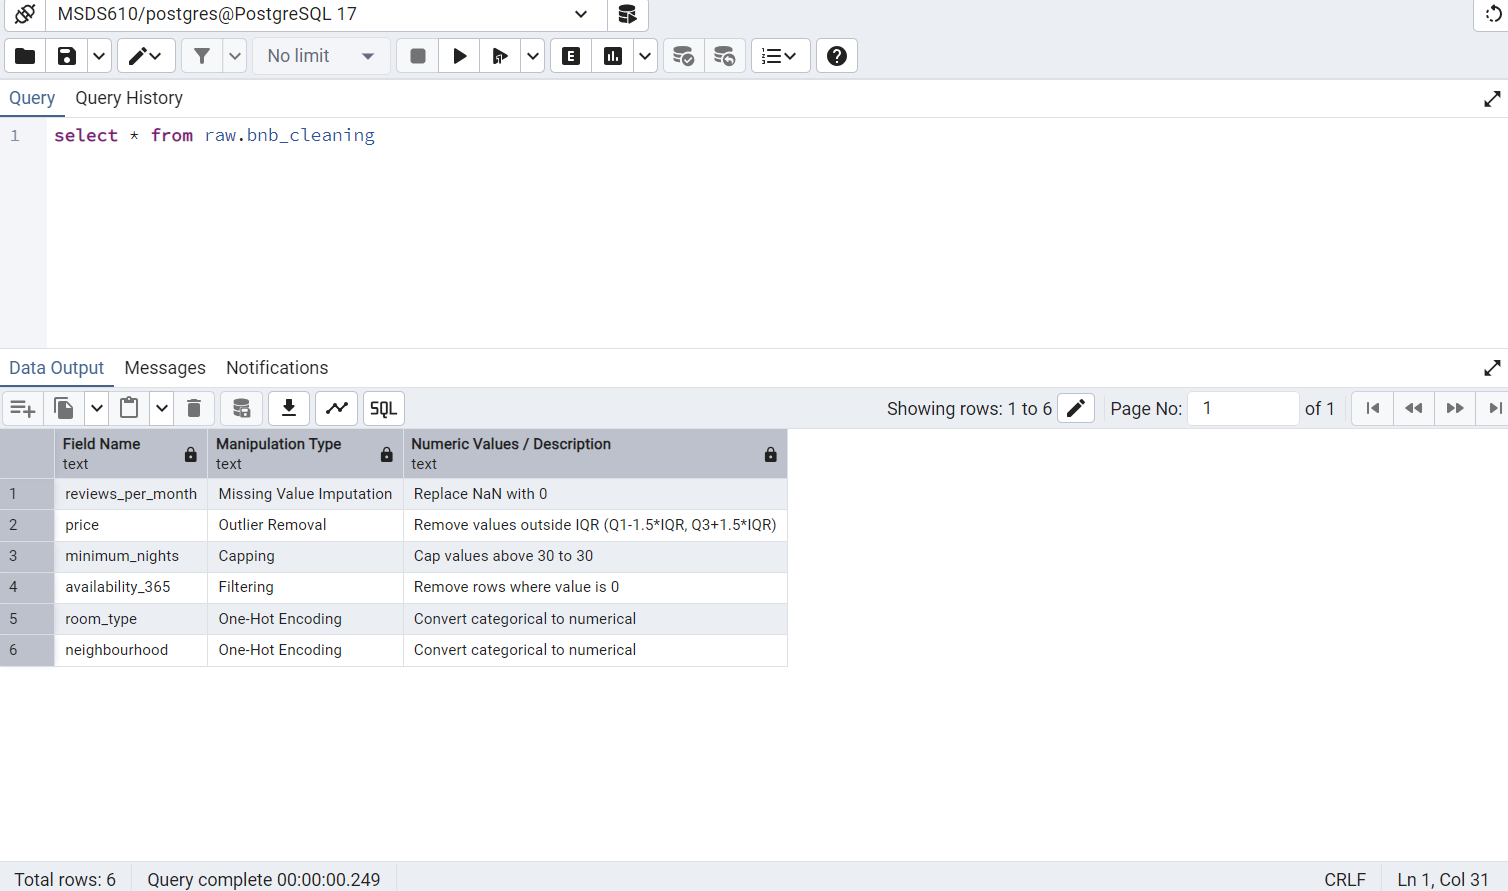

## Feature Engineering and Normalization  

To enhance our analysis and improve model performance, we are creating new features that may influence Airbnb pricing. Additionally, we will normalize selected numerical features to ensure a consistent scale.  

### **New Features**  
We are adding the following engineered features:  

1. **`price_per_review`**: The price of a listing divided by the number of reviews (`price / (number_of_reviews + 1)`). This helps evaluate whether well-reviewed listings have an impact on price. We add `1` to avoid division by zero.  
2. **`host_activity_level`**: Derived from `reviews_per_month`, it categorizes hosts into Low (0-1), Medium (1-3), and High (>3) activity levels. This feature captures how active a host is in receiving reviews.  
3. **`availability_category`**: Converts `availability_365` into categories: Low (0-100 days), Medium (101-250 days), and High (251+ days). This feature helps group listings based on their availability trends.  

### **Normalization**  
To ensure our model treats numerical features fairly, we normalize:  
- **`price`**  
- **`minimum_nights`**  
- **`number_of_reviews`**  
- **`reviews_per_month`**  
- **`calculated_host_listings_count`**  
- **`availability_365`**  

We use **Min-Max Scaling** to transform values between 0 and 1:  

This prevents large-value features from dominating the model.

---

## Feature Engineering Schema  

To track our feature transformations, we define the following schema:  

| Field Name                 | Transformation Type        | Description |
|----------------------------|---------------------------|-------------|
| `price_per_review`         | Feature Engineering       | Price divided by `(number_of_reviews + 1)` |
| `host_activity_level`      | Feature Engineering       | Categorical feature based on `reviews_per_month` |
| `availability_category`    | Feature Engineering       | Categorical feature based on `availability_365` |
| `price`                   | Normalization (Min-Max)   | Rescaled to 0-1 |
| `minimum_nights`          | Normalization (Min-Max)   | Rescaled to 0-1 |
| `number_of_reviews`       | Normalization (Min-Max)   | Rescaled to 0-1 |
| `reviews_per_month`       | Normalization (Min-Max)   | Rescaled to 0-1 |
| `calculated_host_listings_count` | Normalization (Min-Max) | Rescaled to 0-1 |
| `availability_365`        | Normalization (Min-Max)   | Rescaled to 0-1 |

A copy of the cleaned dataset, including new features and normalized values, will be stored in our database for future use.

## Python Code for Feature Engineering and Normalization

In [23]:
# Creating new features
df['price_per_review'] = df['price'] / (df['number_of_reviews'] + 1)  # Avoid division by zero

In [24]:
# Creating host_activity_level feature
df['host_activity_level'] = pd.cut(df['reviews_per_month'], 
                                   bins=[-1, 1, 3, float('inf')], 
                                   labels=['Low', 'Medium', 'High'])

In [25]:
# Creating availability_category feature
df['availability_category'] = pd.cut(df['availability_365'], 
                                     bins=[-1, 100, 250, float('inf')], 
                                     labels=['Low', 'Medium', 'High'])

In [26]:
# Converting categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['host_activity_level', 'availability_category'], drop_first=True)

In [27]:
# Selecting numerical columns for normalization
num_cols = ['minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [28]:
# Applying Min-Max Scaling
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [29]:
# Saving the cleaned and transformed dataset
df.to_csv("cleaned_airbnb_data.csv", index=False)


In [30]:
# Creating feature engineering schema
feature_schema = pd.DataFrame({
    "Field Name": ["price_per_review", "host_activity_level", "availability_category", 
                   "price", "minimum_nights", "number_of_reviews", "reviews_per_month", 
                   "calculated_host_listings_count", "availability_365"],
    "Transformation Type": ["Feature Engineering", "Feature Engineering", "Feature Engineering", 
                            "Normalization (Min-Max)", "Normalization (Min-Max)", "Normalization (Min-Max)", 
                            "Normalization (Min-Max)", "Normalization (Min-Max)", "Normalization (Min-Max)"],
    "Description": ["Price divided by (number_of_reviews + 1)", 
                    "Categorical feature based on reviews_per_month", 
                    "Categorical feature based on availability_365", 
                    "Rescaled to 0-1", "Rescaled to 0-1", "Rescaled to 0-1", 
                    "Rescaled to 0-1", "Rescaled to 0-1", "Rescaled to 0-1"]
})

# Saving schema for future reference
feature_schema.to_csv("feature_engineering_schema.csv", index=False)

# Display final dataset info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4666 entries, 0 to 6396
Data columns (total 89 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   price                                 4666 non-null   int64  
 1   minimum_nights                        4666 non-null   float64
 2   number_of_reviews                     4666 non-null   float64
 3   reviews_per_month                     4666 non-null   float64
 4   calculated_host_listings_count        4666 non-null   float64
 5   availability_365                      4666 non-null   float64
 6   room_type_Hotel room                  4666 non-null   bool   
 7   room_type_Private room                4666 non-null   bool   
 8   room_type_Shared room                 4666 non-null   bool   
 9   neighbourhood_Archer Heights          4666 non-null   bool   
 10  neighbourhood_Armour Square           4666 non-null   bool   
 11  neighbourhood_Ashburn 

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_Archer Heights,...,neighbourhood_West Lawn,neighbourhood_West Pullman,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn,price_per_review,host_activity_level_Medium,host_activity_level_High,availability_category_Medium,availability_category_High
0,60,0.034483,0.281646,0.078939,0.000000,0.967033,False,True,False,False,...,False,False,False,False,False,0.335196,True,False,False,True
1,105,0.034483,0.625000,0.086648,0.000000,0.423077,False,False,False,False,...,False,False,False,False,False,0.265152,True,False,True,False
2,60,0.034483,0.607595,0.086648,0.000000,0.879121,False,False,False,False,...,False,False,False,True,False,0.155844,True,False,False,True
3,65,0.103448,0.077532,0.019426,0.039216,0.821429,False,False,False,False,...,False,False,False,False,False,1.300000,False,False,False,True
4,21,0.000000,0.069620,0.018810,0.019608,0.458791,False,True,False,False,...,False,False,False,False,False,0.466667,False,False,True,False


## Algorithm Selection  

For this problem, our target variable is **`price`**, which is a **continuous** variable. This means we are dealing with a **regression problem**. After evaluating different algorithms, we chose the following:  

### **Chosen Algorithm: Random Forest Regressor**  
We selected **Random Forest Regressor** for the following reasons:  

1. **Handles Non-Linearity**: Airbnb pricing depends on various factors like location, reviews, and availability, which may not have a simple linear relationship.  
2. **Works Well with Missing & Categorical Data**: Random Forest can handle missing values and categorical features after proper encoding.  
3. **Reduces Overfitting**: By using multiple decision trees, it prevents overfitting compared to a single Decision Tree.  
4. **Feature Importance**: It helps identify which features influence pricing the most.  
5. **Performs Well on Medium-Sized Datasets**: Unlike deep learning models, Random Forest does not require an extremely large dataset.  

---

## Model Training: 3-Way Split  
To ensure a well-optimized model, we will use a **3-way split**:  

- **Training Set (70%)**: Used to train the model.  
- **Validation Set (15%)**: Used for hyperparameter tuning.  
- **Test Set (15%)**: Used for final model evaluation.  

---

## Model Optimization Process  
We will perform the following steps:  
1. **Split the data into training, validation, and test sets.**  
2. **Train an initial Random Forest model with default hyperparameters.**  
3. **Perform Hyperparameter Tuning using Grid Search.**  
4. **Evaluate performance on the validation set using RMSE and R².**  
5. **Save the best model using `joblib`.**  
6. **Save validation data (`X_val`, `y_val`) for later use in a separate notebook.**  


In [31]:
# Defining target and features
X = df.drop(columns=['price'])  # Drop target variable
y = df['price']  # Use raw price values

In [32]:
# Performing a 3-way split (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
# Saving validation data for separate evaluation
X_val.to_csv("X_val.csv", index=False)
y_val.to_csv("y_val.csv", index=False)

In [34]:
# Step 1: Training a baseline Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Step 2: Evaluating baseline performance
y_pred_val = rf.predict(X_val)
baseline_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
baseline_r2 = r2_score(y_val, y_pred_val)

print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Baseline R²: {baseline_r2:.2f}")

Baseline RMSE: 11.86
Baseline R²: 0.96


In [36]:
# Step 3: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [37]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [38]:
# Step 4: Evaluating optimized model
best_rf = grid_search.best_estimator_
y_pred_val_opt = best_rf.predict(X_val)
optimized_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val_opt))
optimized_r2 = r2_score(y_val, y_pred_val_opt)

print(f"Optimized RMSE: {optimized_rmse:.2f}")
print(f"Optimized R²: {optimized_r2:.2f}")
print(f"Best Parameters: {grid_search.best_params_}")

Optimized RMSE: 11.74
Optimized R²: 0.96
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
# Step 5: Saving the best model using joblib
joblib.dump(best_rf, "random_forest_model.pkl")

['random_forest_model.pkl']

In [40]:
# Step 6: Saving the test set for final evaluation
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [41]:
# Saving the list of feature names from X_train
model_features = list(X_train.columns)

# Save feature names to a file for later use
joblib.dump(model_features, "model_features.pkl")

print("Feature names saved successfully in model_features.pkl!")

Feature names saved successfully in model_features.pkl!


To be continued....................</br>
How good will be the predection? To know future update tune on to part two of the assignment.</br>
Thank You